![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [119]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [120]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [149]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [123]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [124]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [125]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [213]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [128]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
36554,id_1427,Milan,"['Italian', 'Brew Pub', 'Fast Food', 'Pub', 'W...",1429.0,$$ - $$$,45.0,"[[], []]",/Restaurant_Review-g187849-d10436451-Reviews-B...,d10436451,1,4.5
21738,id_5293,Milan,['Wine Bar'],5296.0,$$ - $$$,10.0,"[['Superb fiorentina steak'], ['11/30/2014']]",/Restaurant_Review-g187849-d6179979-Reviews-La...,d6179979,1,3.5
34054,id_4132,Madrid,['Spanish'],4134.0,$$ - $$$,2.0,"[[], []]",/Restaurant_Review-g187514-d10151694-Reviews-L...,d10151694,1,5.0
15087,id_2780,Madrid,"['Spanish', 'Cafe']",2782.0,$,30.0,[['Perfect for a quick lunch after our daily.....,/Restaurant_Review-g187514-d5796251-Reviews-Lo...,d5796251,1,4.5
2364,id_2364,London,NaN,9176.0,NaN,2.0,"[['Great Cuppa', 'Delicious coffee, friendly s...",/Restaurant_Review-g186338-d8705042-Reviews-Tr...,d8705042,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [152]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [153]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [155]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [156]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
# data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [157]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0


In [21]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
12171,id_953,Vienna,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",954.0,$$ - $$$,187.0,"[['Il Mare', 'best pizza'], ['10/28/2017', '01...",/Restaurant_Review-g190454-d1889514-Reviews-Il...,d1889514,1,3.5,0
30222,id_3998,Madrid,['Mediterranean'],4000.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g187514-d11619603-Reviews-S...,d11619603,1,5.0,1
21418,id_3649,Lisbon,"['Seafood', 'Mediterranean', 'Portuguese', 'Eu...",3654.0,$$ - $$$,35.0,"[['Overpriced chaotic tourist trap', 'Pairots ...",/Restaurant_Review-g189158-d3874973-Reviews-Fr...,d3874973,1,2.0,0
12012,id_2596,Lyon,NaN,2595.0,NaN,0.0,"[[], []]",/Restaurant_Review-g187265-d12874574-Reviews-L...,d12874574,1,2.0,1
46893,id_568,Berlin,"['German', 'Fast Food']",569.0,$,68.0,"[['One of my favorites!', 'Fantastic value and...",/Restaurant_Review-g187323-d1341412-Reviews-Cu...,d1341412,1,4.5,0


#### Возьмем следующий признак "Price Range".

In [158]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [159]:
# Ваша обработка 'Price Range'
data['NaN_Price_Range'] = pd.isna(data['Price Range']).astype('float64')
# заполнение по словарю
dic_value_Price = {'$':1,'$$ - $$$':2,'$$$$':3}
data['Price Range']=data['Price Range'].replace(to_replace=dic_value_Price)

print(data['Price Range'].describe())
price_range_mean = round(data['Price Range'].mean())

print('Средний ценовой диапазон: ', price_range_mean)

count    32639.000000
mean         1.815129
std          0.509800
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Price Range, dtype: float64
Средний ценовой диапазон:  2


In [160]:
# 18412 ресторанов это более 70% из заполненной информации имеют средний параметр цены
# поэтому заполняем пропуски средним значением
data['Price Range'].fillna(price_range_mean, inplace=True)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [163]:
# Конвертируем стили кухни в список и заполним пропуски
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other']")
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x if type(x) is list else x[2:-2].split("\', \'"))
# Новый признах - количество стилей представленных в ресторане
data['count_cuisine_style'] = data['Cuisine Style'].apply(len)

In [215]:
# Функция нормализации рейтинга ресторана в городе
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
rating_max = dict()
rating_min = dict()
def norm_rating_city(rating):
    city = rating['City']
    rating = rating['Ranking']
    result = (rating - rating_min[city]) / (rating_max[city] - rating_min[city])
    return result

# Нормализация рейтинга в городе
cities = list(data['City'].unique())


for city in cities:
    rating_max[city] = data[(data['City'] == city)]['Ranking'].max()
    rating_min[city] = data[(data['City'] == city)]['Ranking'].min()

data['norm_ranking_city'] = data[['City', 'Ranking']].apply(norm_rating_city, axis = 1)

In [221]:
for city in cities:
    rating_max[city] = data[(data['City'] == city)]['Ranking'].max()
    rating_min[city] = data[(data['City'] == city)]['Ranking'].min()

    
num_review_by_city = data[['City', 'Number of Reviews']].groupby('City').mean()
# num_review_by_city['Number of Reviews']['Paris']    # [(num_review_by_city['City'] == 'Paris')]
test = data[['City', 'Number of Reviews']].apply(lambda x: num_review_by_city['Number of Reviews'][x['City']] if pd.isna(x['Number of Reviews']) else x, axis = 1)
test

,City,Number of Reviews
0,Paris,4.0
1,Helsinki,97.0
2,Edinburgh,28.0
3,London,202.0
4,Bratislava,162.0
...,...,...
49995,Milan,79.0
49996,Paris,542.0
49997,Stockholm,4.0
49998,Warsaw,70.0


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

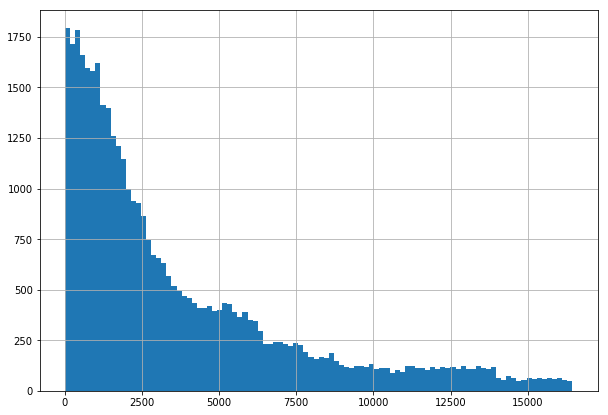

In [26]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

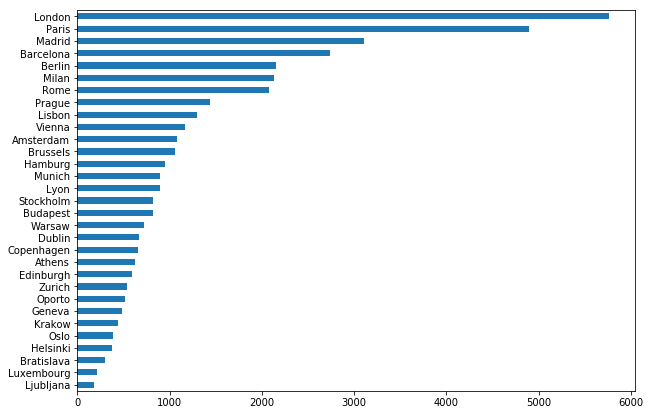

In [27]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

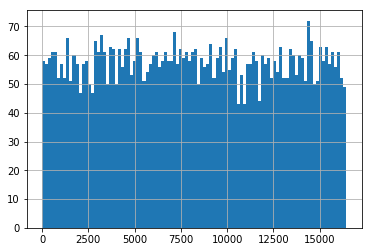

In [166]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

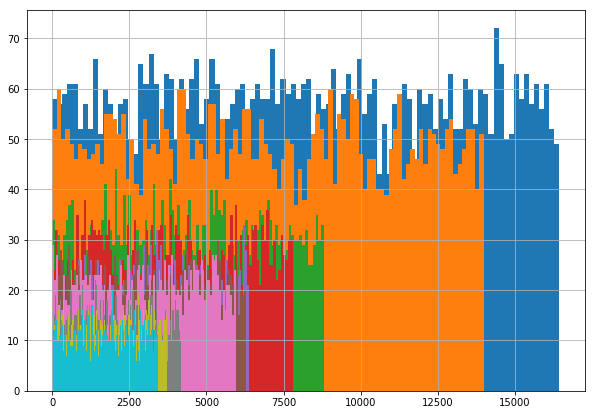

In [29]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

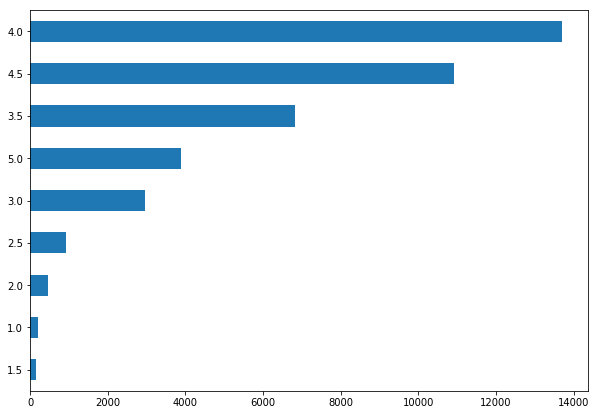

In [30]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

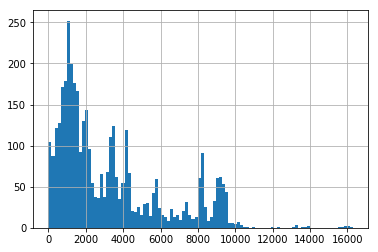

In [144]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

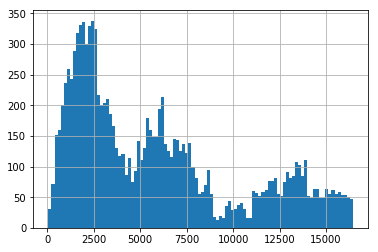

In [145]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

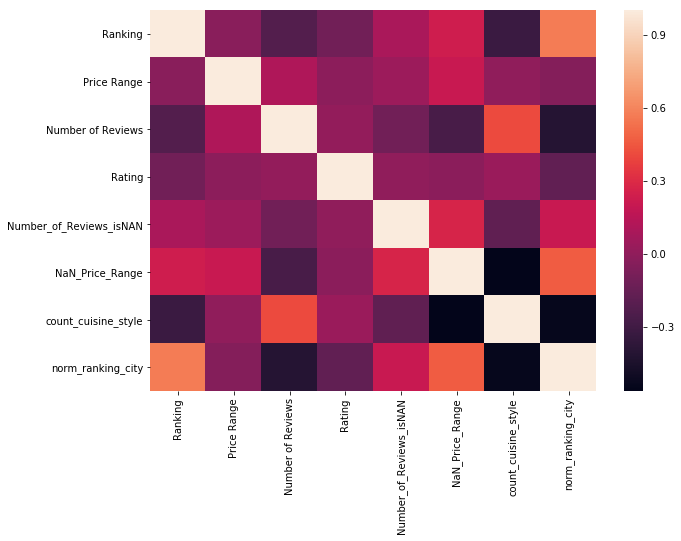

In [167]:
plt.rcParams['figure.figsize'] = (10,7)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [245]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [244]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    cities = list(df_output['City'].unique())
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
#     num_review_by_city = df_output[['City', 'Number of Reviews']].groupby('City').mean()
    # num_review_by_city['Number of Reviews']['Paris']    # [(num_review_by_city['City'] == 'Paris')]
#     df_output['Number of Reviews'] = df_output.apply(lambda x: num_review_by_city['Number of Reviews'][x['City']] if pd.isna(x['Number of Reviews']) else x, axis = 1)
    
    # Ковертирование Price Range и заполенение пропусков
    df_output['NaN_Price_Range'] = pd.isna(df_output['Price Range']).astype('float64')
    # заполнение по словарю
    dic_value_Price = {'$':1,'$$ - $$$':2,'$$$$':3}
    df_output['Price Range']=df_output['Price Range'].replace(to_replace=dic_value_Price)
    price_range_mean = round(df_output['Price Range'].mean())
    df_output['Price Range'] = df_output['Price Range'].fillna(price_range_mean)

    # Конвертируем стили кухни в список и заполним пропуски
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna("['Other']")
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x if type(x) is list else x[2:-2].split("\', \'"))
    # Новый признах - количество стилей представленных в ресторане
    df_output['count_cuisine_style'] = df_output['Cuisine Style'].apply(len)
    
    # ################### 3. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    # Нормализация рейтинга в городе
    for city in cities:
        rating_max[city] = df_output[(df_output['City'] == city)]['Ranking'].max()
        rating_min[city] = df_output[(df_output['City'] == city)]['Ranking'].min()

    df_output['norm_ranking_city'] = df_output[['City', 'Ranking']].apply(norm_rating_city, axis = 1)
    
    # Одинаковые id - сетевые рестораны?
    counts_id = df_output.Restaurant_id.value_counts()
    df_output['counts_id'] = df_output['Restaurant_id'].apply(lambda x: counts_id[x])
    
    # ################### 4. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    df_output.drop(['Ranking','Restaurant_id',], axis = 1, inplace=True)
  
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [246]:
df_preproc = preproc_data(data)
display(df_preproc.sample(10))
display(df_preproc.info())

,Price Range,sample,Rating,NaN_Price_Range,count_cuisine_style,norm_ranking_city,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
48656,2.0,1,4.0,1.0,2,0.778188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16390,2.0,1,4.0,1.0,1,0.783203,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
302,2.0,0,0.0,1.0,1,0.282552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10885,1.0,1,4.5,0.0,5,0.404533,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9533,1.0,0,0.0,0.0,3,0.599139,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34018,3.0,1,5.0,0.0,3,0.602657,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3979,2.0,0,0.0,0.0,3,0.507669,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17255,2.0,1,4.0,0.0,1,0.676005,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3526,1.0,0,0.0,0.0,1,0.824424,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47600,2.0,1,4.5,0.0,3,0.131327,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
Price Range            50000 non-null float64
sample                 50000 non-null int64
Rating                 50000 non-null float64
NaN_Price_Range        50000 non-null float64
count_cuisine_style    50000 non-null int64
norm_ranking_city      50000 non-null float64
City_Amsterdam         50000 non-null uint8
City_Athens            50000 non-null uint8
City_Barcelona         50000 non-null uint8
City_Berlin            50000 non-null uint8
City_Bratislava        50000 non-null uint8
City_Brussels          50000 non-null uint8
City_Budapest          50000 non-null uint8
City_Copenhagen        50000 non-null uint8
City_Dublin            50000 non-null uint8
City_Edinburgh         50000 non-null uint8
City_Geneva            50000 non-null uint8
City_Hamburg           50000 non-null uint8
City_Helsinki          50000 non-null uint8
City_Krakow            50000 non-null uint8
Cit

None

In [104]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
Price Range            50000 non-null float64
Number of Reviews      50000 non-null float64
sample                 50000 non-null int64
Rating                 50000 non-null float64
NaN_Price_Range        50000 non-null float64
count_cuisine_style    50000 non-null int64
norm_ranking_city      50000 non-null float64
City_Amsterdam         50000 non-null uint8
City_Athens            50000 non-null uint8
City_Barcelona         50000 non-null uint8
City_Berlin            50000 non-null uint8
City_Bratislava        50000 non-null uint8
City_Brussels          50000 non-null uint8
City_Budapest          50000 non-null uint8
City_Copenhagen        50000 non-null uint8
City_Dublin            50000 non-null uint8
City_Edinburgh         50000 non-null uint8
City_Geneva            50000 non-null uint8
City_Hamburg           50000 non-null uint8
City_Helsinki          50000 non-null uint8
C

In [248]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [249]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [250]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 37), (40000, 37), (40000, 36), (32000, 36), (8000, 36))

# Model 
Сам ML

In [239]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [251]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [252]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [253]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.292606875


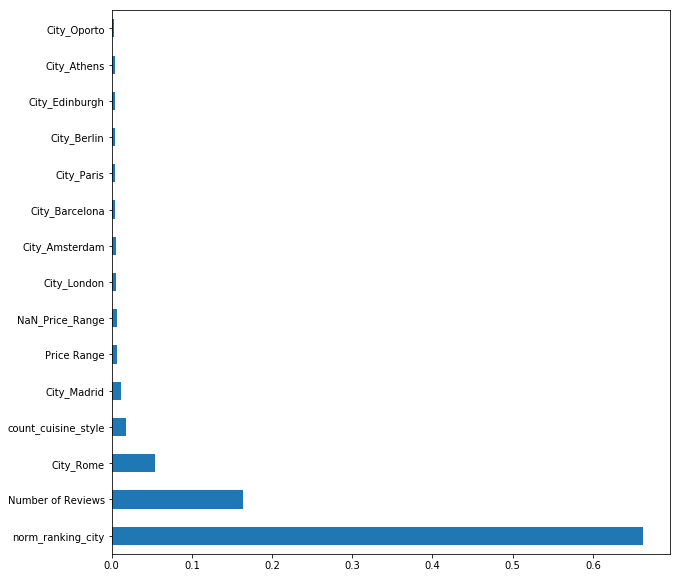

In [113]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [46]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
153,16426.0,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1181,2257.0,4.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8771,2085.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
272,124.0,649.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,5740.0,32.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2970,118.0,998.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2870,3301.0,34.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8345,2623.0,6.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5728,2615.0,131.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3488,1702.0,30.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_data = test_data.drop(['Rating'], axis=1)

In [48]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [49]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [50]:
predict_submission

array([3.005, 4.295, 4.56 , ..., 3.   , 4.5  , 4.32 ])

In [51]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.295
2,id_2,4.560
3,id_3,4.155
4,id_4,4.485
5,id_5,4.580
6,id_6,1.475
7,id_7,3.220
8,id_8,4.100
9,id_9,4.750


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
